In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16
from operator import itemgetter
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv("./csv/fossil-fuel-co2-emissions-by-nation_csv.csv")
pays = set(df['Country'])

In [4]:
df.head()

Year      Country  Total  Solid Fuel  Liquid Fuel  Gas Fuel  Cement  \
0  1949  AFGHANISTAN      4           4            0         0       0   
1  1950  AFGHANISTAN     23           6           18         0       0   
2  1951  AFGHANISTAN     25           7           18         0       0   
3  1952  AFGHANISTAN     25           9           17         0       0   
4  1953  AFGHANISTAN     29          10           18         0       0   

   Gas Flaring  Per Capita  Bunker fuels (Not in Total)  
0            0         0.0                            0  
1            0         0.0                            0  
2            0         0.0                            0  
3            0         0.0                            0  
4            0         0.0                            0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 10 columns):
Year                           17232 non-null int64
Country                        17232 non-null object
Total                          17232 non-null int64
Solid Fuel                     17232 non-null int64
Liquid Fuel                    17232 non-null int64
Gas Fuel                       17232 non-null int64
Cement                         17232 non-null int64
Gas Flaring                    17232 non-null int64
Per Capita                     17232 non-null float64
Bunker fuels (Not in Total)    17232 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ MB


In [6]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')

In [7]:
df = pd.read_csv("./csv/fossil-fuel-co2-emissions-by-nation_csv.csv", parse_dates=['Year'], index_col='Year', date_parser=dateparse) 
df.head(15)

Country  Total  Solid Fuel  Liquid Fuel  Gas Fuel  Cement  \
Year                                                                        
1949-01-01  AFGHANISTAN      4           4            0         0       0   
1950-01-01  AFGHANISTAN     23           6           18         0       0   
1951-01-01  AFGHANISTAN     25           7           18         0       0   
1952-01-01  AFGHANISTAN     25           9           17         0       0   
1953-01-01  AFGHANISTAN     29          10           18         0       0   
1954-01-01  AFGHANISTAN     29          12           18         0       0   
1955-01-01  AFGHANISTAN     42          17           25         0       0   
1956-01-01  AFGHANISTAN     50          17           33         0       0   
1957-01-01  AFGHANISTAN     80          21           59         0       0   
1958-01-01  AFGHANISTAN     90          25           65         0       0   
1959-01-01  AFGHANISTAN    105          30           70         0       5   
1960-01-01  AFGHANISTAN    113          35           74         0       5   
1961-01-01  AFGHANISTAN    134          48           80         0       6   
1962-01-01  AFGHANISTAN    188          81           99         0       8   
1963-01-01  AFGHANISTAN    193          72          107         0      14   

            Gas Flaring  Per Capita  Bunker fuels (Not in Total)  
Year                                                              
1949-01-01            0        0.00                            0  
1950-01-01            0        0.00                            0  
1951-01-01            0        0.00                            0  
1952-01-01            0        0.00                            0  
1953-01-01            0        0.00                            0  
1954-01-01            0        0.00                            0  
1955-01-01            0        0.00                            0  
1956-01-01            0        0.01                            0  
1957-01-01            0        0.01                            0  
1958-01-01            0        0.01                            0  
1959-01-01            0        0.01                            0  
1960-01-01            0        0.01                            0  
1961-01-01            0        0.01                            0  
1962-01-01            0        0.02                            0  
1963-01-01            0        0.02                            0

In [8]:
df.dtypes

Country                         object
Total                            int64
Solid Fuel                       int64
Liquid Fuel                      int64
Gas Fuel                         int64
Cement                           int64
Gas Flaring                      int64
Per Capita                     float64
Bunker fuels (Not in Total)      int64
dtype: object

In [9]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)


Country  Total  Solid Fuel  Liquid Fuel  Gas Fuel  Cement  \
Year                                                                        
1949-01-01  AFGHANISTAN      4           4            0         0       0   
1950-01-01  AFGHANISTAN     23           6           18         0       0   
1951-01-01  AFGHANISTAN     25           7           18         0       0   
1952-01-01  AFGHANISTAN     25           9           17         0       0   
1953-01-01  AFGHANISTAN     29          10           18         0       0   
1954-01-01  AFGHANISTAN     29          12           18         0       0   
1955-01-01  AFGHANISTAN     42          17           25         0       0   
1956-01-01  AFGHANISTAN     50          17           33         0       0   
1957-01-01  AFGHANISTAN     80          21           59         0       0   
1958-01-01  AFGHANISTAN     90          25           65         0       0   
1959-01-01  AFGHANISTAN    105          30           70         0       5   
1960-01-01  AFGHANISTAN    113          35           74         0       5   
1961-01-01  AFGHANISTAN    134          48           80         0       6   
1962-01-01  AFGHANISTAN    188          81           99         0       8   
1963-01-01  AFGHANISTAN    193          72          107         0      14   

            Gas Flaring  Per Capita  Bunker fuels (Not in Total)  
Year                                                              
1949-01-01            0        0.00                            0  
1950-01-01            0        0.00                            0  
1951-01-01            0        0.00                            0  
1952-01-01            0        0.00                            0  
1953-01-01            0        0.00                            0  
1954-01-01            0        0.00                            0  
1955-01-01            0        0.00                            0  
1956-01-01            0        0.01                            0  
1957-01-01            0        0.01                            0  
1958-01-01            0        0.01                            0  
1959-01-01            0        0.01                            0  
1960-01-01            0        0.01                            0  
1961-01-01            0        0.01                            0  
1962-01-01            0        0.02                            0  
1963-01-01            0        0.02                            0

In [10]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17232 entries, 1949-01-01 to 2014-01-01
Data columns (total 9 columns):
Country                        17232 non-null object
Total                          17232 non-null int64
Solid Fuel                     17232 non-null int64
Liquid Fuel                    17232 non-null int64
Gas Fuel                       17232 non-null int64
Cement                         17232 non-null int64
Gas Flaring                    17232 non-null int64
Per Capita                     17232 non-null float64
Bunker fuels (Not in Total)    17232 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.3+ MB


#### here we turn the lines where the show is missing

In [11]:
ts.dropna(inplace=True)

#### some times series visualizations

In [12]:
pays_co2_emission = ts.groupby('Country')

In [14]:
pays_co2_emission.head(20)

Country  Total  Solid Fuel  Liquid Fuel  Gas Fuel  Cement  \
Year                                                                        
1949-01-01  AFGHANISTAN      4           4            0         0       0   
1950-01-01  AFGHANISTAN     23           6           18         0       0   
1951-01-01  AFGHANISTAN     25           7           18         0       0   
1952-01-01  AFGHANISTAN     25           9           17         0       0   
1953-01-01  AFGHANISTAN     29          10           18         0       0   
1954-01-01  AFGHANISTAN     29          12           18         0       0   
1955-01-01  AFGHANISTAN     42          17           25         0       0   
1956-01-01  AFGHANISTAN     50          17           33         0       0   
1957-01-01  AFGHANISTAN     80          21           59         0       0   
1958-01-01  AFGHANISTAN     90          25           65         0       0   
1959-01-01  AFGHANISTAN    105          30           70         0       5   
1960-01-01  AFGHANISTAN    113          35           74         0       5   
1961-01-01  AFGHANISTAN    134          48           80         0       6   
1962-01-01  AFGHANISTAN    188          81           99         0       8   
1963-01-01  AFGHANISTAN    193          72          107         0      14   
1964-01-01  AFGHANISTAN    229          82          130         0      17   
1965-01-01  AFGHANISTAN    275         104          148         0      23   
1966-01-01  AFGHANISTAN    298         117          157         0      24   
1967-01-01  AFGHANISTAN    350         109          152        71      18   
1968-01-01  AFGHANISTAN    334          91          136        95      13   
1933-01-01      ALBANIA      2           0            2         0       0   
1934-01-01      ALBANIA      2           0            2         0       0   
1935-01-01      ALBANIA      5           0            5         0       0   
1936-01-01      ALBANIA     35           0           34         0       1   
1937-01-01      ALBANIA     81           0           79         0       2   
1938-01-01      ALBANIA     95           0           95         0       0   
1939-01-01      ALBANIA    118           0          118         0       0   
1940-01-01      ALBANIA    189           0          189         0       0   
1941-01-01      ALBANIA    171           0          169         0       2   
1942-01-01      ALBANIA    203           0          203         0       0   
...                 ...    ...         ...          ...       ...     ...   
1960-01-01     ZANZIBAR      9           0            9         0       0   
1961-01-01     ZANZIBAR      9           0            9         0       0   
1962-01-01     ZANZIBAR     11           0           11         0       0   
1963-01-01     ZANZIBAR      9           0            9         0       0   
1964-01-01     ZANZIBAR      8           0            8         0       0   
1965-01-01     ZANZIBAR      9           0            9         0       0   
1966-01-01     ZANZIBAR      8           0            8         0       0   
1967-01-01     ZANZIBAR      9           0            9         0       0   
1968-01-01     ZANZIBAR      9           0            9         0       0   
1969-01-01     ZANZIBAR      6           0            6         0       0   
1903-01-01     ZIMBABWE     31          31            0         0       0   
1904-01-01     ZIMBABWE     39          39            0         0       0   
1905-01-01     ZIMBABWE     64          64            0         0       0   
1906-01-01     ZIMBABWE     69          69            0         0       0   
1907-01-01     ZIMBABWE     76          76            0         0       0   
1908-01-01     ZIMBABWE    108         108            0         0       0   
1909-01-01     ZIMBABWE    112         112            0         0       0   
1910-01-01     ZIMBABWE    118         118            0         0       0   
1911-01-01     ZIMBABWE    140         140            0         0       0   
1912-01-01  

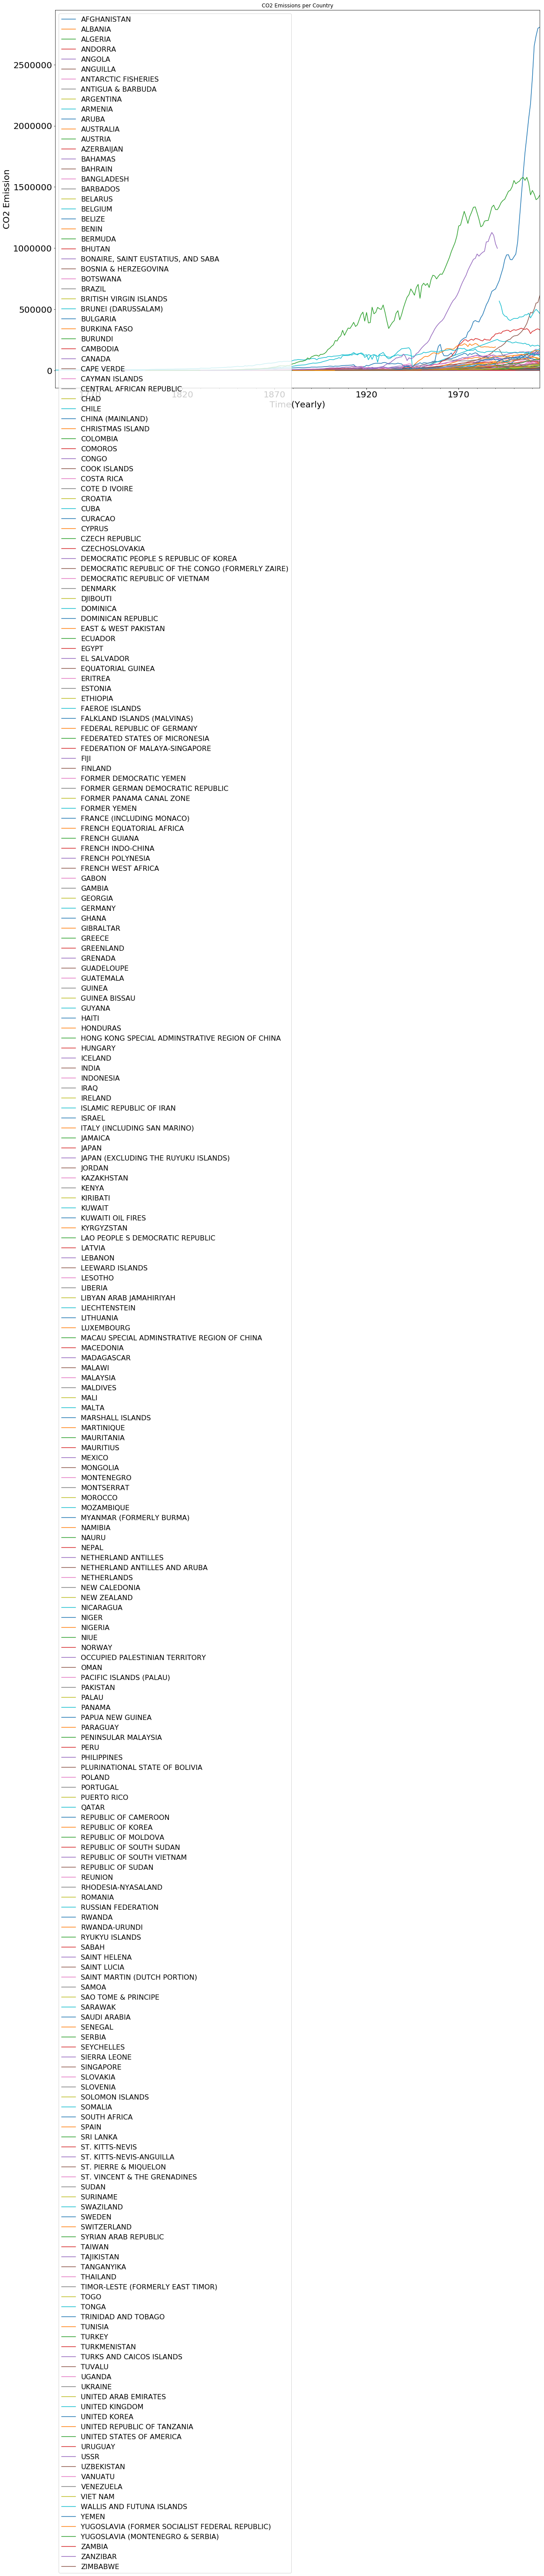

In [15]:
fig, ax = plt.subplots()
for desc, group in pays_co2_emission:
    group.plot(x = group.index, y='Total', label=desc,ax = ax, title='CO2 Emissions per Country', fontsize = 20)
    ax.set_xlabel('Time(Yearly)')
    ax.set_ylabel('CO2 Emission')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)



#### bar chart of co2 emission per country

In [16]:
co2_par_pays = ts.groupby('Country')['Total'].sum().sort_values()

In [17]:
cols = ['CANADA','FRANCE','RUSSIAN','INDIA','GERMANY',
        'JAPAN','UNITED KINGDOM','USSR','CHINA','UNITED STATES OF AMERICA']
co2_par_pays.tail()

Country
JAPAN                        14585037
UNITED KINGDOM               20500813
USSR                         30790355
CHINA (MAINLAND)             47649834
UNITED STATES OF AMERICA    102510260
Name: Total, dtype: int64

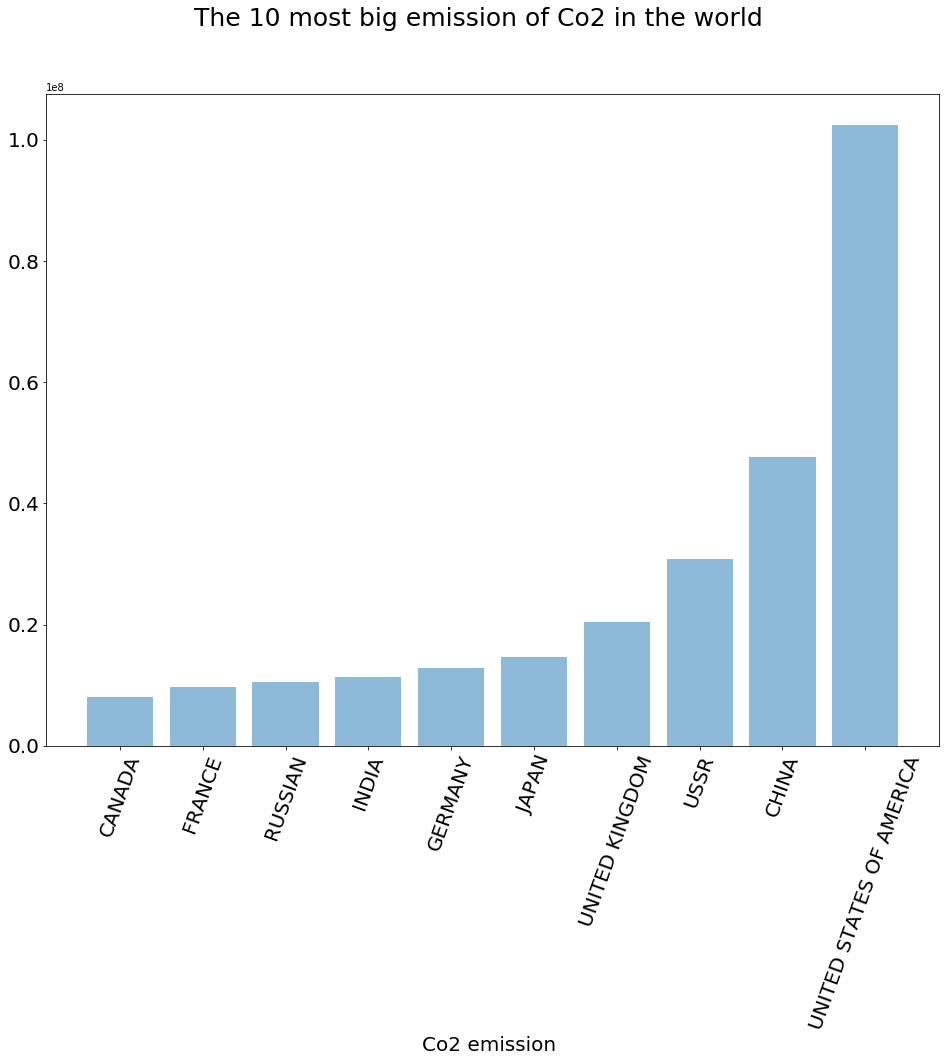

In [18]:
fig = plt.figure(figsize = (16,12))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, co2_par_pays.tail(10), align = 'center', alpha = 0.5)
fig.suptitle("The 10 most big emission of Co2 in the world", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Co2 emission ', fontsize = 20)
plt.show()

In [19]:
ts.iloc[:,:]

Country  Total  Solid Fuel  Liquid Fuel  Gas Fuel  Cement  \
Year                                                                        
1949-01-01  AFGHANISTAN      4           4            0         0       0   
1950-01-01  AFGHANISTAN     23           6           18         0       0   
1951-01-01  AFGHANISTAN     25           7           18         0       0   
1952-01-01  AFGHANISTAN     25           9           17         0       0   
1953-01-01  AFGHANISTAN     29          10           18         0       0   
1954-01-01  AFGHANISTAN     29          12           18         0       0   
1955-01-01  AFGHANISTAN     42          17           25         0       0   
1956-01-01  AFGHANISTAN     50          17           33         0       0   
1957-01-01  AFGHANISTAN     80          21           59         0       0   
1958-01-01  AFGHANISTAN     90          25           65         0       0   
1959-01-01  AFGHANISTAN    105          30           70         0       5   
1960-01-01  AFGHANISTAN    113          35           74         0       5   
1961-01-01  AFGHANISTAN    134          48           80         0       6   
1962-01-01  AFGHANISTAN    188          81           99         0       8   
1963-01-01  AFGHANISTAN    193          72          107         0      14   
1964-01-01  AFGHANISTAN    229          82          130         0      17   
1965-01-01  AFGHANISTAN    275         104          148         0      23   
1966-01-01  AFGHANISTAN    298         117          157         0      24   
1967-01-01  AFGHANISTAN    350         109          152        71      18   
1968-01-01  AFGHANISTAN    334          91          136        95      13   
1969-01-01  AFGHANISTAN    257          99          144         0      14   
1970-01-01  AFGHANISTAN    456         119          183        59      13   
1971-01-01  AFGHANISTAN    517          98          204       120      12   
1972-01-01  AFGHANISTAN    418          52          171        82      13   
1973-01-01  AFGHANISTAN    447          85          192        91      19   
1974-01-01  AFGHANISTAN    523          83          210       109      20   
1975-01-01  AFGHANISTAN    580         109          239       130      20   
1976-01-01  AFGHANISTAN    542         116          241        82      23   
1977-01-01  AFGHANISTAN    652         123          266       140      19   
1978-01-01  AFGHANISTAN    589         157          255        82      17   
...                 ...    ...         ...          ...       ...     ...   
1985-01-01     ZIMBABWE   2799        2197          507         0      95   
1986-01-01     ZIMBABWE   3580        2961          517         0     102   
1987-01-01     ZIMBABWE   4156        3548          497         0     110   
1988-01-01     ZIMBABWE   4391        3658          628         0     105   
1989-01-01     ZIMBABWE   4414        3715          601         0      98   
1990-01-01     ZIMBABWE   4266        3662          510         0      95   
1991-01-01     ZIMBABWE   4351        3486          747         0     118   
1992-01-01     ZIMBABWE   4639        3688          829         0     122   
1993-01-01     ZIMBABWE   4462        3427          899         0     136   
1994-01-01     ZIMBABWE   4853        3699         1008         0     146   
1995-01-01     ZIMBABWE   4126        2896         1098         0     132   
1996-01-01     ZIMBABWE   4089        2865         1088         0     136   
1997-01-01     ZIMBABWE   3929        2591         1188         0     150   
1998-01-01     ZIMBABWE   3887        2656         1081         0     150   
1999-01-01     ZIMBABWE   4318        2893         1289         0     136   
2000-01-01     ZIMBABWE   3797        2763          898         0     136   
2001-01-01     ZIMBABWE   3435        2604          723         0     109   
2002-01-01     ZIMBABWE   3263        2490          691         0      82   
2003-01-01     ZIMBABWE   2906        2234          619         0      54   
2004-01-01  

In [20]:
Emissions = ts.iloc[:,:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Country', pd.TimeGrouper('M')])['Total'].sum().unstack(level = 0)
mte = Emissions['ALGERIA'] # monthly total emissions (mte)

In [21]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [22]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

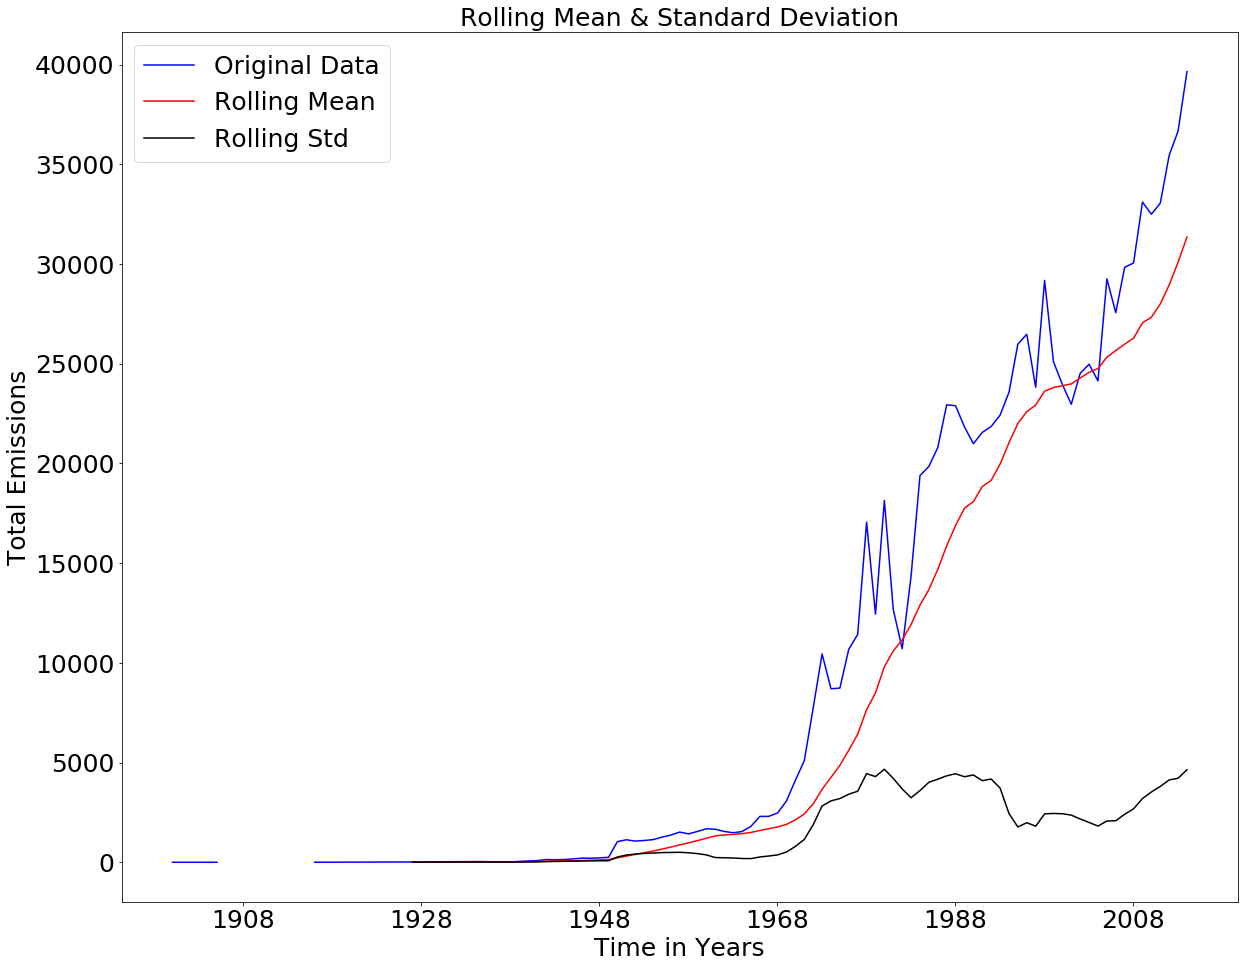

In [23]:
TestStationaryPlot(mte)

In [24]:
TestStationaryAdfuller(mte.dropna(inplace=False))

Test Statistic                   2.267998
p-value                          0.998934
#Lags Used                       1.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### here the test indicates that the series are not stationary

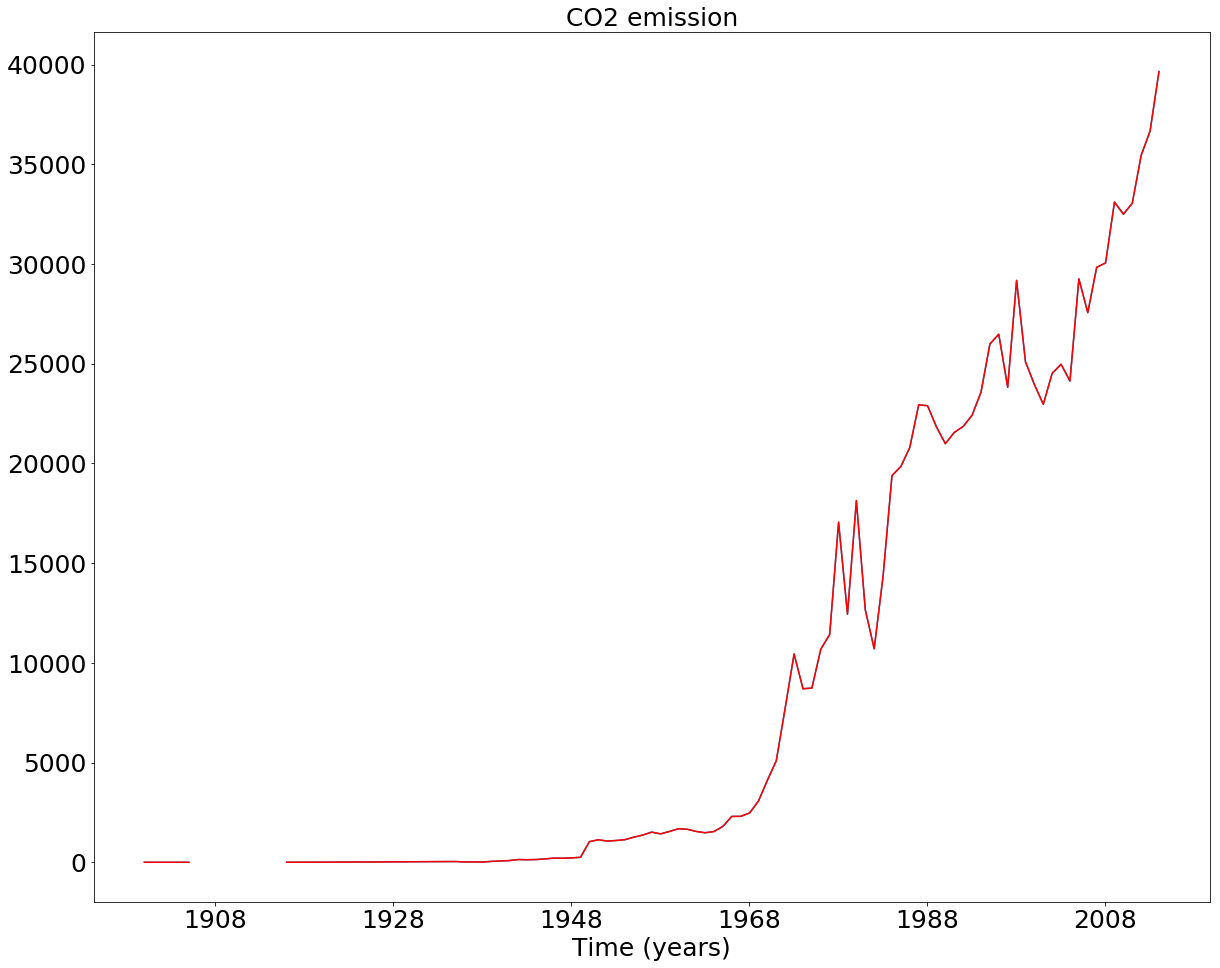

In [25]:
moving_avg = mte.rolling(1).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.title('CO2 emission', fontsize = 25)
plt.show()

In [26]:
mte_moving_avg_diff = mte - moving_avg
mte_moving_avg_diff.tail(50)

Year
1965-01-31    0.0
1966-01-31    0.0
1967-01-31    0.0
1968-01-31    0.0
1969-01-31    0.0
1970-01-31    0.0
1971-01-31    0.0
1972-01-31    0.0
1973-01-31    0.0
1974-01-31    0.0
1975-01-31    0.0
1976-01-31    0.0
1977-01-31    0.0
1978-01-31    0.0
1979-01-31    0.0
1980-01-31    0.0
1981-01-31    0.0
1982-01-31    0.0
1983-01-31    0.0
1984-01-31    0.0
1985-01-31    0.0
1986-01-31    0.0
1987-01-31    0.0
1988-01-31    0.0
1989-01-31    0.0
1990-01-31    0.0
1991-01-31    0.0
1992-01-31    0.0
1993-01-31    0.0
1994-01-31    0.0
1995-01-31    0.0
1996-01-31    0.0
1997-01-31    0.0
1998-01-31    0.0
1999-01-31    0.0
2000-01-31    0.0
2001-01-31    0.0
2002-01-31    0.0
2003-01-31    0.0
2004-01-31    0.0
2005-01-31    0.0
2006-01-31    0.0
2007-01-31    0.0
2008-01-31    0.0
2009-01-31    0.0
2010-01-31    0.0
2011-01-31    0.0
2012-01-31    0.0
2013-01-31    0.0
2014-01-31    0.0
Name: ALGERIA, dtype: float64

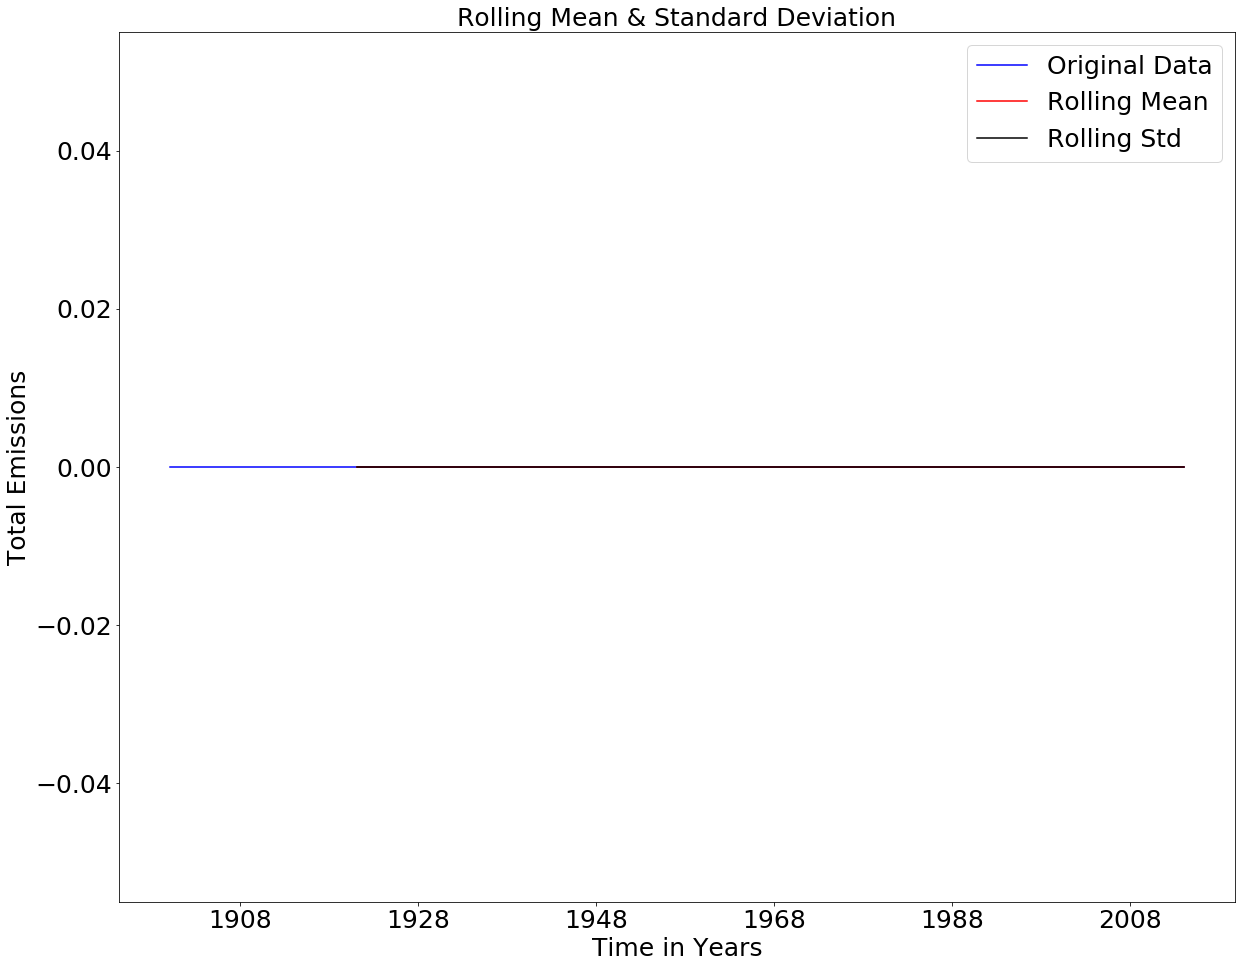

In [27]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [28]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


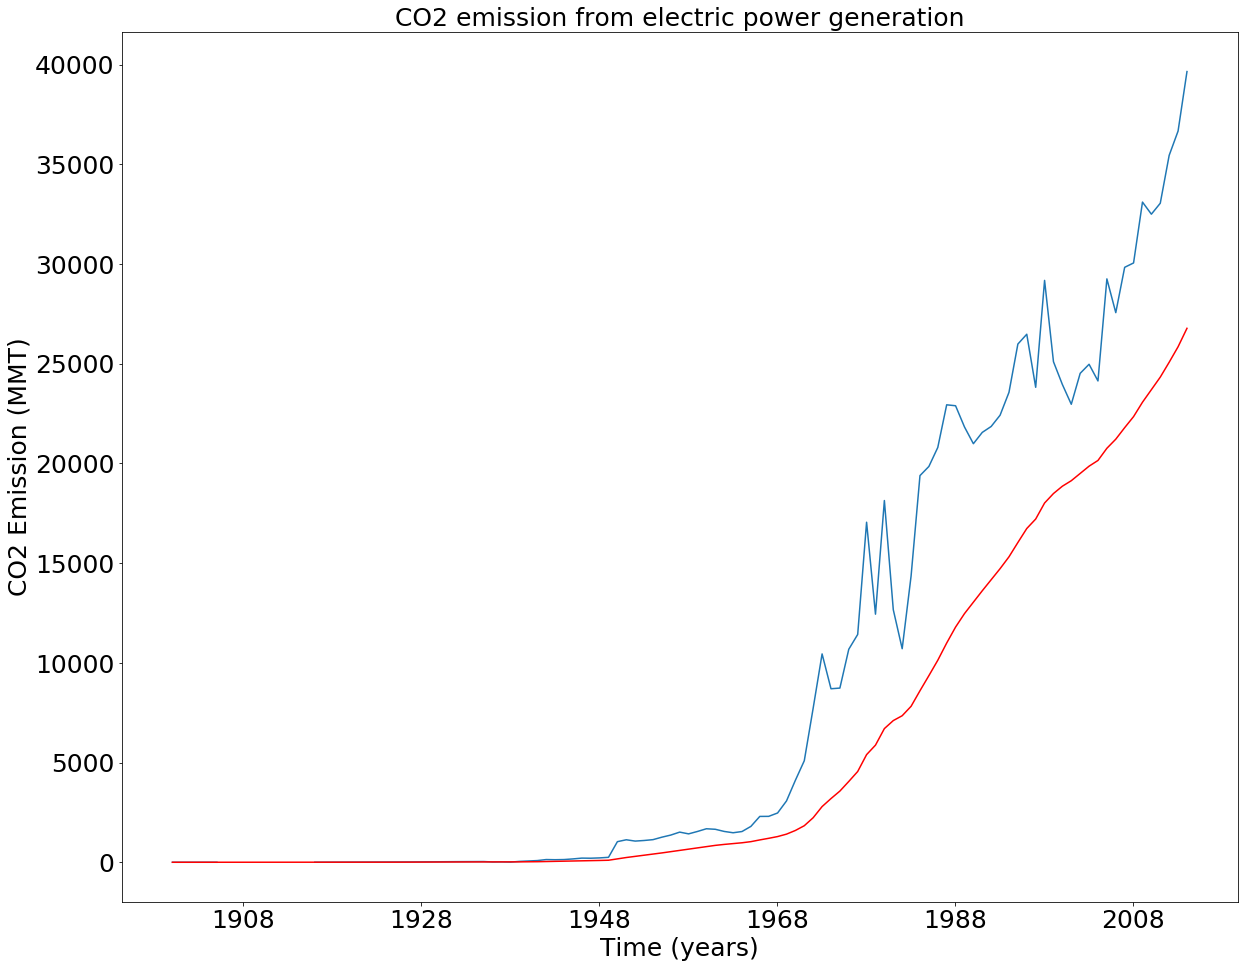

In [29]:
mte_exp_wighted_avg = pd.ewma(mte, halflife=10)
plt.plot(mte)
plt.plot(mte_exp_wighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()


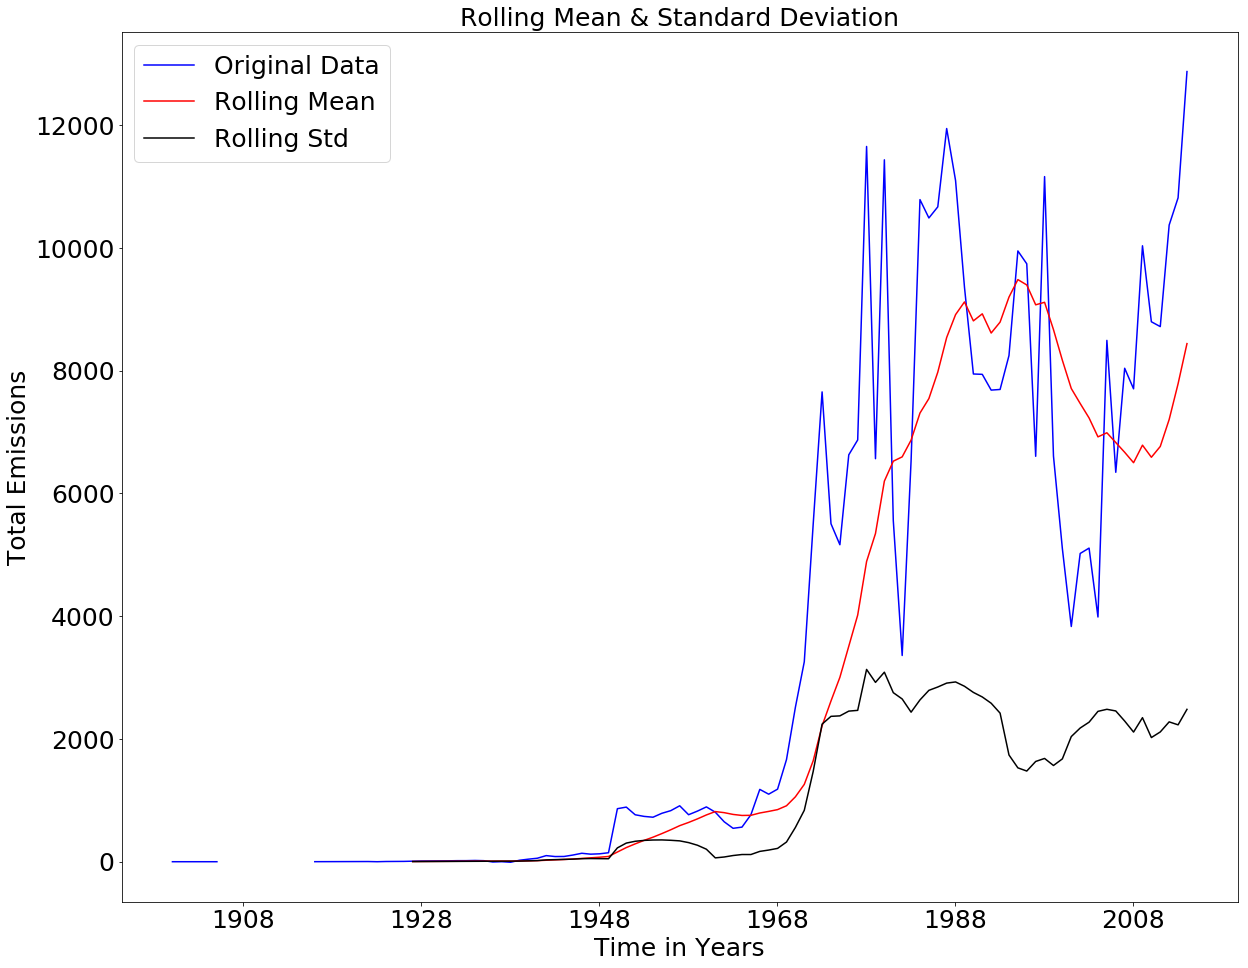

In [30]:

mte_ewma_diff = mte - mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)



In [31]:
mte_ewma_diff.dropna(inplace=True)

In [32]:
mte_ewma_diff

Year
1900-01-31        0.000000
1901-01-31        0.000000
1902-01-31        0.000000
1903-01-31        0.000000
1904-01-31        0.000000
1905-01-31        0.000000
1916-01-31        0.703289
1917-01-31        1.292321
1918-01-31        3.410403
1919-01-31        2.794929
1920-01-31        3.179870
1921-01-31        3.561257
1922-01-31        3.073705
1923-01-31        0.064274
1924-01-31        3.574120
1925-01-31        4.050560
1926-01-31        5.389405
1927-01-31        9.300215
1928-01-31       11.956742
1929-01-31       12.593368
1930-01-31       12.305066
1931-01-31       14.801572
1932-01-31       17.110561
1933-01-31       17.430359
1934-01-31       20.498753
1935-01-31       16.935651
1936-01-31       -4.643796
1937-01-31        0.327092
1938-01-31       -8.893859
1939-01-31       24.031726
                  ...     
1985-01-31    10489.619650
1986-01-31    10670.745407
1987-01-31    11947.045882
1988-01-31    11098.916526
1989-01-31     9359.589963
1990-01-31     7947.363

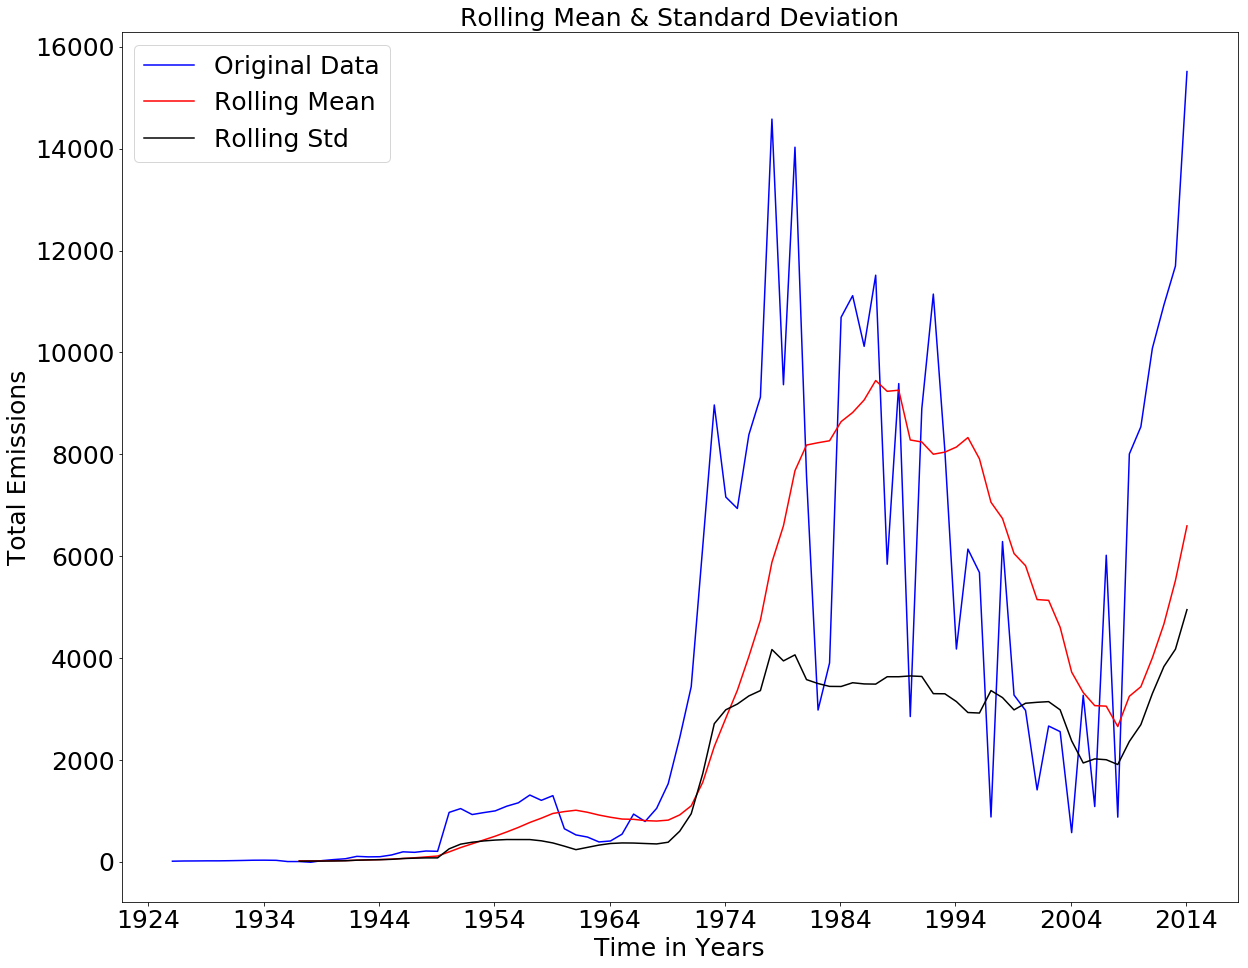

In [33]:
mte_first_difference = mte - mte.shift(10)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [34]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                 -1.038863
p-value                         0.738828
#Lags Used                     10.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


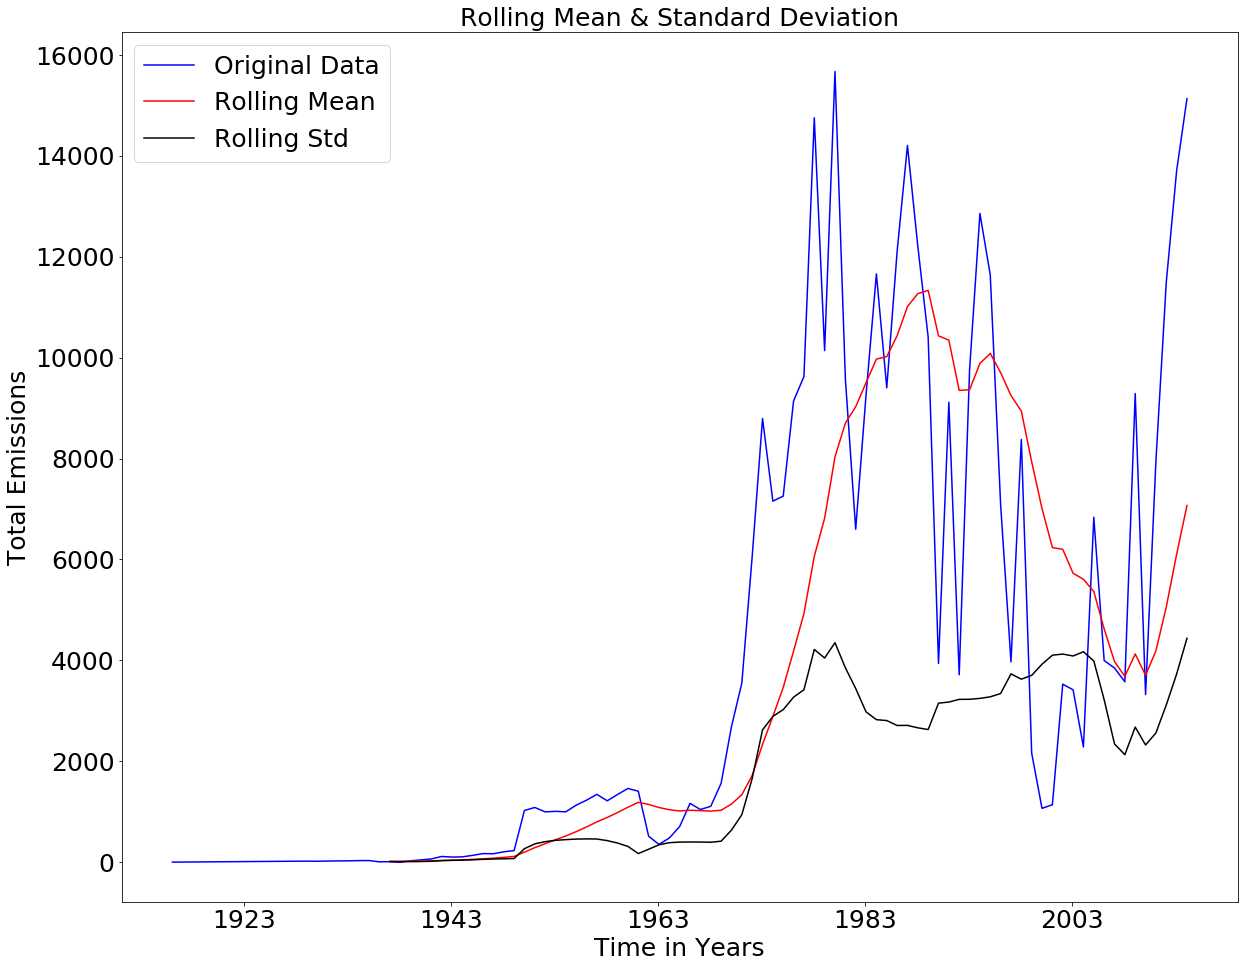

Test Statistic                 -1.362843
p-value                         0.599954
#Lags Used                     12.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [35]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

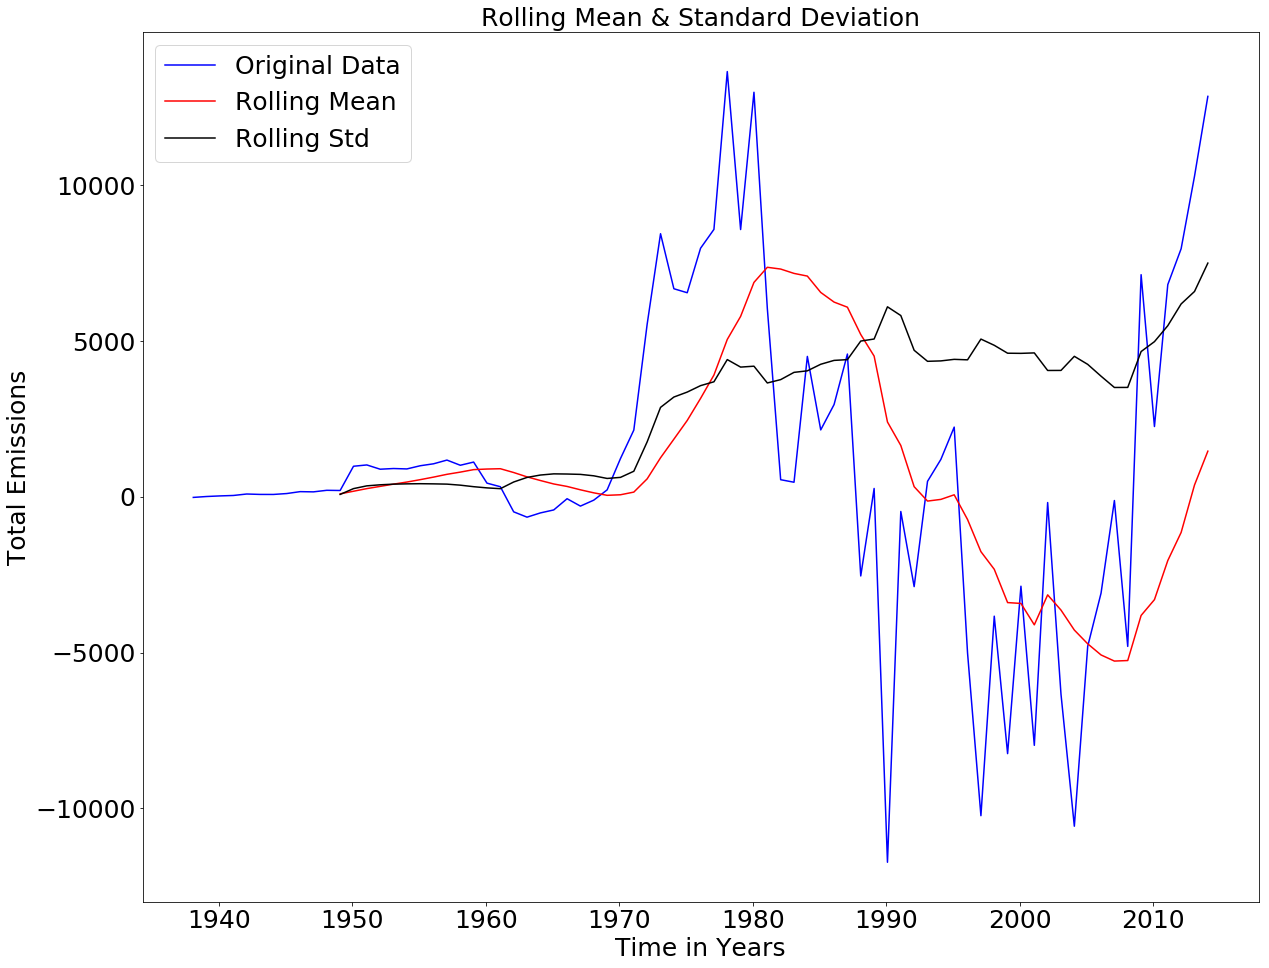

In [36]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [37]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                 -2.790369
p-value                         0.059663
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [40]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 1)
SARIMAX: (0, 1, 0) x (0, 1, 0, 1)


In [41]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

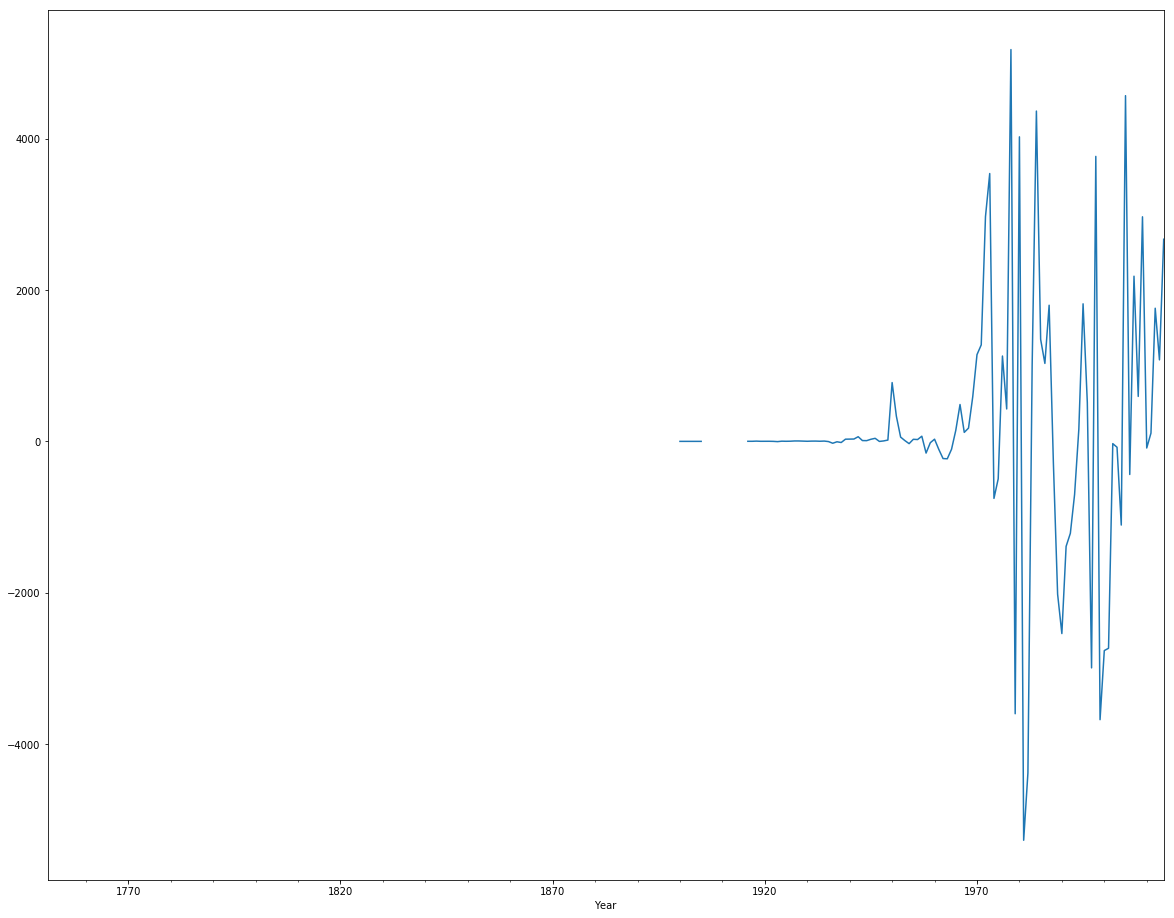

In [42]:
results.resid.plot()

In [43]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            ALGERIA   No. Observations:                  264
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -938.498
Date:                            Sat, 12 Jan 2019   AIC                           1884.995
Time:                                    15:06:05   BIC                           1899.299
Sample:                                01-31-1751   HQIC                          1890.743
                                     - 01-31-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4161      0.206     -2.022      0.043      -0.820      -0.013
ma.L1          0.1208      0.243   

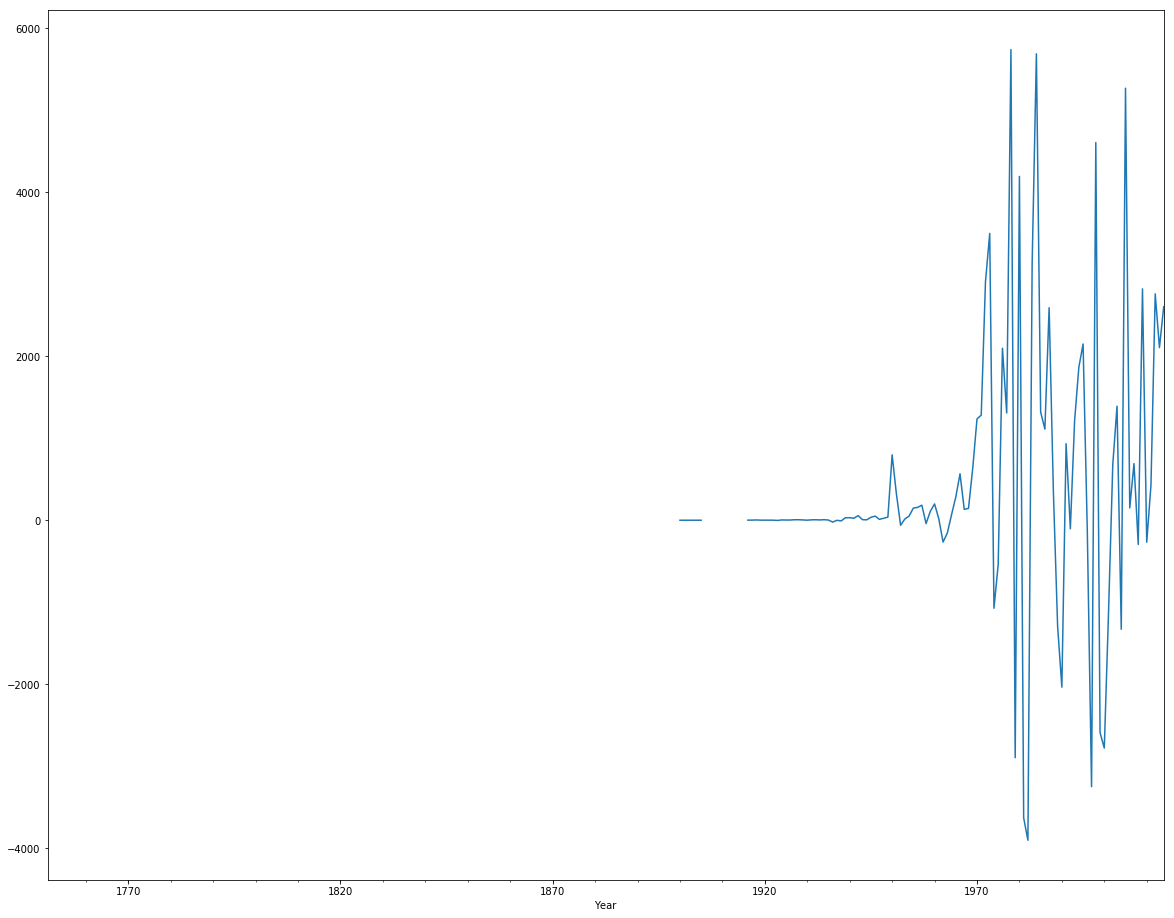

In [44]:
results.resid.plot()

In [45]:

pred = results.get_prediction(start = 90, end = 104, dynamic=False)
pred_ci = pred.predicted_mean
pred_ci.head(15)


1841-01-31    0.0
1842-01-31    0.0
1843-01-31    0.0
1844-01-31    0.0
1845-01-31    0.0
1846-01-31    0.0
1847-01-31    0.0
1848-01-31    0.0
1849-01-31    0.0
1850-01-31    0.0
1851-01-31    0.0
1852-01-31    0.0
1853-01-31    0.0
1854-01-31    0.0
1855-01-31    0.0
Freq: A-JAN, dtype: float64

IndexingError: Too many indexers

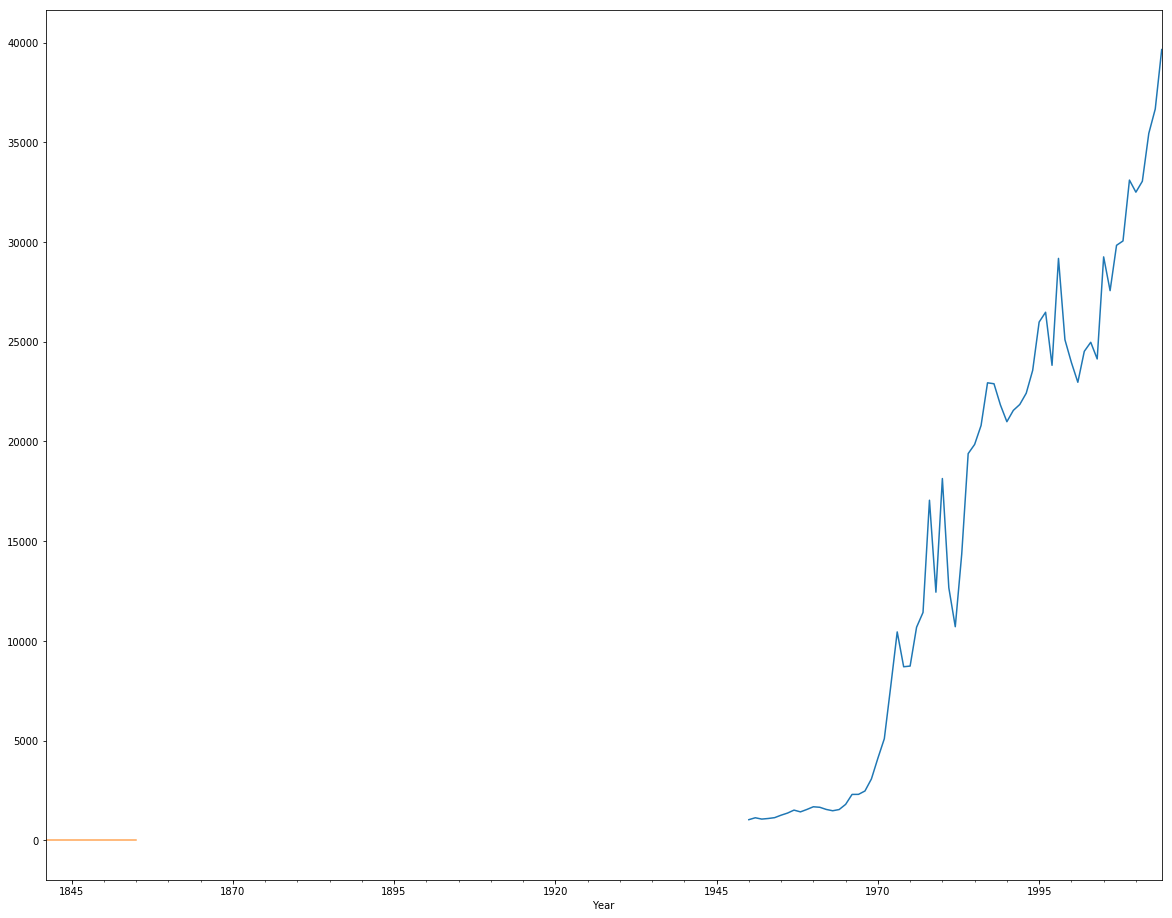

In [46]:
ax = mte['1950':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [47]:
mte['2013-01-31':]

Year
2013-01-31    36669.0
2014-01-31    39651.0
Name: ALGERIA, dtype: float64

In [48]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is nan
The Root Mean Square Error (RMSE) of the forcast: nan


In [49]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

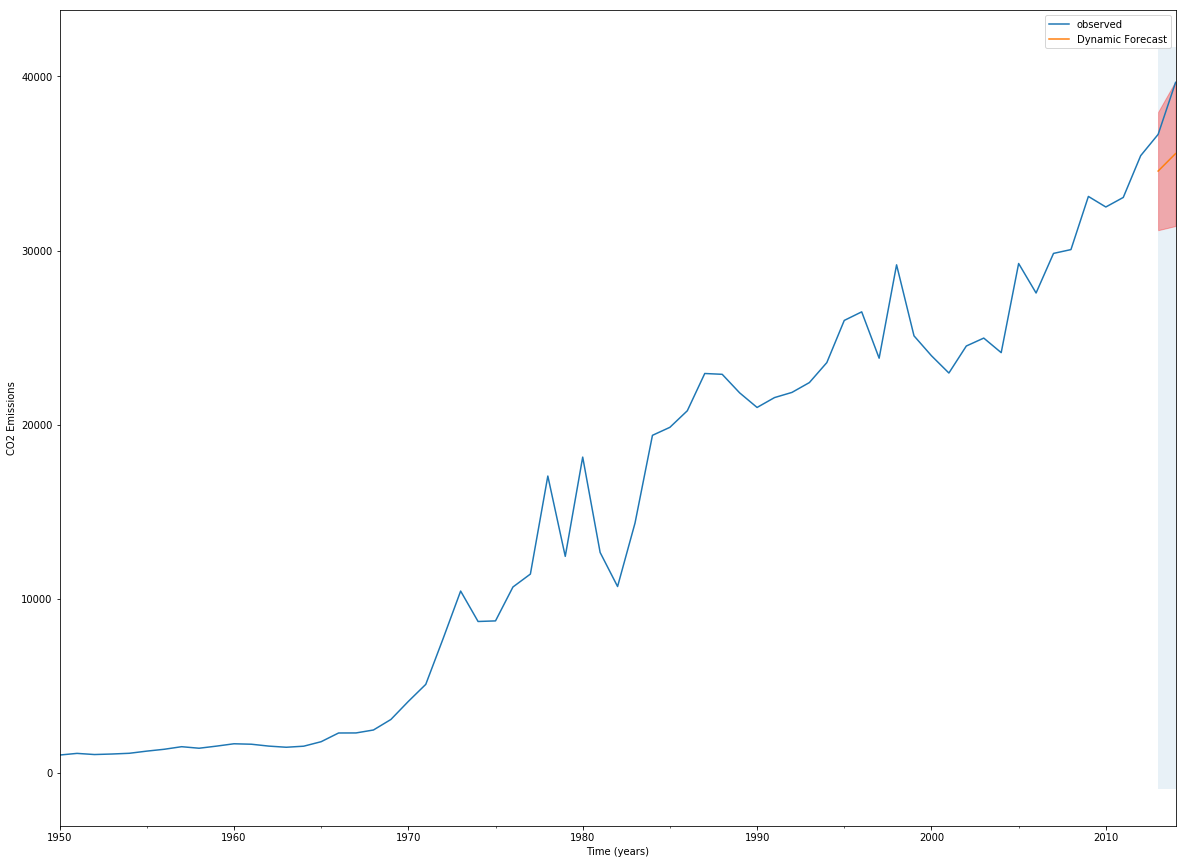

In [50]:
ax = mte['1950':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                

pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [51]:
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['1950-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 10559514.27
The Root Mean Square Error (RMSE) of the forcast: nan


In [52]:
Algeria_prediction = results.get_prediction(start=0,end=100,dynamic=False)

In [177]:
def Algo_globale_apprentissage_pred(ts,pays):
    final_res = {}
    for pay in pays:
        print(pay)
        Emissions = ts.iloc[:,:]   # Monthly total emissions (mte)
        Emissions= Emissions.groupby(['Country', pd.TimeGrouper('M')])['Total'].sum().unstack(level = 0)
        mte = Emissions[pay] 
        p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
        pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
        pdq_x_QDQs = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
        #print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
        #print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
        #print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))
        for param in pdq:
            for seasonal_param in pdq_x_QDQs:
                try:
                    mod = sm.tsa.statespace.SARIMAX(mte,
                                                order=param,
                                                seasonal_order=seasonal_param,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                    results = mod.fit()
                    #print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                except:
                    continue

        #print(results.summary())

        pred_pays = results.get_prediction(start = len(mte), end = len(mte)+35, dynamic=False)
        pred_ci = pred_pays.predicted_mean.values
        final_res[pay]=pred_ci
    return final_res

In [55]:
pays = set(df['Country'])
pays

{'AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANDORRA',
 'ANGOLA',
 'ANGUILLA',
 'ANTARCTIC FISHERIES',
 'ANTIGUA & BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'ARUBA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BERMUDA',
 'BHUTAN',
 'BONAIRE, SAINT EUSTATIUS, AND SABA',
 'BOSNIA & HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRITISH VIRGIN ISLANDS',
 'BRUNEI (DARUSSALAM)',
 'BULGARIA',
 'BURKINA FASO',
 'BURUNDI',
 'CAMBODIA',
 'CANADA',
 'CAPE VERDE',
 'CAYMAN ISLANDS',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'CHILE',
 'CHINA (MAINLAND)',
 'CHRISTMAS ISLAND',
 'COLOMBIA',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS',
 'COSTA RICA',
 'COTE D IVOIRE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'CZECH REPUBLIC',
 'CZECHOSLOVAKIA',
 'DEMOCRATIC PEOPLE S REPUBLIC OF KOREA',
 'DEMOCRATIC REPUBLIC OF THE CONGO (FORMERLY ZAIRE)',
 'DEMOCRATIC REPUBLIC OF VIETNAM',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICA',
 'DOMINICAN REPU

In [56]:
res_predit_pay = Algo_globale_apprentissage_pred(ts,pays)

GREENLAND
COMOROS
EL SALVADOR
SEYCHELLES
REPUBLIC OF SOUTH VIETNAM
TURKS AND CAICOS ISLANDS
PERU
REPUBLIC OF SUDAN
FRENCH POLYNESIA
TAIWAN
SWITZERLAND
MARTINIQUE
ST. KITTS-NEVIS
GUINEA BISSAU
KYRGYZSTAN
POLAND
BERMUDA
CURACAO
KUWAIT
REPUBLIC OF CAMEROON
REPUBLIC OF KOREA
ARUBA
CHAD
COSTA RICA
MARSHALL ISLANDS
GUATEMALA
ST. PIERRE & MIQUELON
RYUKYU ISLANDS
DOMINICA
UNITED STATES OF AMERICA
BOSNIA & HERZEGOVINA
RHODESIA-NYASALAND
SOMALIA
SLOVENIA
BANGLADESH
EGYPT
ESTONIA
NEW CALEDONIA
ALGERIA
TANGANYIKA
HONDURAS
LAO PEOPLE S DEMOCRATIC REPUBLIC
MONTENEGRO
CENTRAL AFRICAN REPUBLIC
AZERBAIJAN
GREECE
FRENCH WEST AFRICA
ANGOLA
SAMOA
MONTSERRAT
DEMOCRATIC REPUBLIC OF THE CONGO (FORMERLY ZAIRE)
PENINSULAR MALAYSIA
ANGUILLA
SLOVAKIA
UNITED REPUBLIC OF TANZANIA
LEEWARD ISLANDS
TUVALU
GABON
YUGOSLAVIA (FORMER SOCIALIST FEDERAL REPUBLIC)
FRENCH INDO-CHINA
ZANZIBAR
LIBERIA
MAURITIUS
JAPAN
INDONESIA
BHUTAN
KIRIBATI
MEXICO
TRINIDAD AND TOBAGO
CYPRUS
BURKINA FASO
DOMINICAN REPUBLIC
MADAGASCAR
MOROCCO


In [224]:
test = "FEDERAL REPUBLIC OF GERMANY"

In [225]:
emissions = ts.iloc[:,:]
emissions= emissions.groupby(['Country', pd.TimeGrouper('M')])['Total'].sum().unstack(level = 0)
yte = emissions[test] 
mod = sm.tsa.statespace.SARIMAX(yte, 
                                order=(1,1,1), 
                                seasonal_order=(1,2,2,1),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

In [226]:
tt = np.abs(np.ceil(results.get_prediction(start=len(yte),end=len(yte)+35,dynamic=True).predicted_mean.values))

In [230]:
tt = np.abs(np.ceil(Algo_globale_apprentissage_pred(ts,[test])[test]))

FEDERAL REPUBLIC OF GERMANY


In [270]:
s= ''
for x,i in zip(tt,range(len(tt))) :
    s+= (str(x-182000+(i*5000))+',')

In [271]:
s

'828396.0,833502.0,838608.0,843714.0,848820.0,853926.0,859032.0,864139.0,869245.0,874351.0,879457.0,884563.0,889669.0,894775.0,899881.0,904988.0,910094.0,915200.0,920306.0,925412.0,930518.0,935624.0,940730.0,945836.0,950943.0,956049.0,961155.0,966261.0,971367.0,976473.0,981579.0,986685.0,991791.0,996898.0,1002004.0,1007110.0,'

In [61]:
data = pd.read_csv("./continents_pays.csv",sep=",")

In [62]:
data_numpy = data.ix[:,1:].values

In [69]:
res_predit_pay['ALGERIA'][0]

39555.54839500961

In [63]:
import json
 
with open('./final.json') as f : data_json = json.load(f)

In [169]:
for ele in data_json['country']:
    for i in np.arange(65,101):
        if(len(ele['data']['emissions']) ==101):
            ele['data']['emissions'][i] = np.abs(np.ceil(res_predit_pay[str(ele['pays'])][i-65]))
      #  print(ele['pays'],res_predit_pay[ele['pays']][i-65])
        #print(str(ele['pays']))

In [170]:
data_json

{'country': [{'data': {'annees': [1950,
     1951,
     1952,
     1953,
     1954,
     1955,
     1956,
     1957,
     1958,
     1959,
     1960,
     1961,
     1962,
     1963,
     1964,
     1965,
     1966,
     1967,
     1968,
     1969,
     1970,
     1971,
     1972,
     1973,
     1974,
     1975,
     1976,
     1977,
     1978,
     1979,
     1980,
     1981,
     1982,
     1983,
     1984,
     1985,
     1986,
     1987,
     1988,
     1989,
     1990,
     1991,
     1992,
     1993,
     1994,
     1995,
     1996,
     1997,
     1998,
     1999,
     2000,
     2001,
     2002,
     2003,
     2004,
     2005,
     2006,
     2007,
     2008,
     2009,
     2010,
     2011,
     2012,
     2013,
     2014,
     2015,
     2016,
     2017,
     2018,
     2019,
     2020,
     2021,
     2022,
     2023,
     2024,
     2025,
     2026,
     2027,
     2028,
     2029,
     2030,
     2031,
     2032,
     2033,
     2034,
     2035,
     2036,
     2037,
   

In [171]:
dictionnaire = dict(data_numpy)

In [172]:
new_json_file = {'name':'monde',
                'children':[
                    {
                        'name':'ASIA',
                        'children':[]
                    },
                      {
                        'name':'EUROPE',
                        'children':[]
                    },
                      {
                        'name':'AFRIQUE',
                        'children':[]
                    },
                      {
                        'name':'CENTRAL AMERICA',
                        'children':[]
                    },
                    {
                        'name':'OTHER',
                        'children':[]
                    },
                    {
                        'name':'AUSTRALIA',
                        'children':[]
                    },
                    
                     {
                        'name':'SOUTH AMERICA',
                        'children':[]
                    },
                       {
                        'name':'NORTH AMERICA',
                        'children':[]
                    },
                ]}

In [173]:
for ele_1 in data_json["country"]:
    countr = dictionnaire[ele_1["pays"].replace(',',"")]
    for child in new_json_file["children"]:
        if(child["name"] == countr):
            child["children"].append(ele_1)
    

In [174]:
def ecrire_json(resultat):
    import json
    json = json.dumps(resultat)
    f = open("./final_1.json","w")
    f.write(json)
    f.close()

In [175]:
ecrire_json(new_json_file)

In [275]:
df.head()

Country  Total  Solid Fuel  Liquid Fuel  Gas Fuel  Cement  \
Year                                                                        
1949-01-01  AFGHANISTAN      4           4            0         0       0   
1950-01-01  AFGHANISTAN     23           6           18         0       0   
1951-01-01  AFGHANISTAN     25           7           18         0       0   
1952-01-01  AFGHANISTAN     25           9           17         0       0   
1953-01-01  AFGHANISTAN     29          10           18         0       0   

            Gas Flaring  Per Capita  Bunker fuels (Not in Total)  
Year                                                              
1949-01-01            0         0.0                            0  
1950-01-01            0         0.0                            0  
1951-01-01            0         0.0                            0  
1952-01-01            0         0.0                            0  
1953-01-01            0         0.0                            0

In [285]:
solid_fuel=(df.groupby('Country')['Solid Fuel'].mean()/df.groupby('Country')['Total'].mean())

In [286]:
Liquid_Fuel = (df.groupby('Country')['Liquid Fuel'].mean()/df.groupby('Country')['Total'].mean())

In [287]:
Gas_Fuel = (df.groupby('Country')['Gas Fuel'].mean()/df.groupby('Country')['Total'].mean())

In [288]:
Cement = (df.groupby('Country')['Cement'].mean()/df.groupby('Country')['Total'].mean())

In [289]:
Gas_Flaring = (df.groupby('Country')['Gas Flaring'].mean()/df.groupby('Country')['Total'].mean())

In [290]:
Per_Capita = (df.groupby('Country')['Per Capita'].mean()/df.groupby('Country')['Total'].mean())

In [298]:
data_ = {}


In [300]:
for pay in pays:
    data_[pay] = {'proportions':[solid_fuel[pay],Liquid_Fuel[pay],Gas_Fuel[pay],Cement[pay],Gas_Flaring[pay],Per_Capita[pay]]}

In [301]:
data_

{'AFGHANISTAN': {'proportions': [0.23966984386579102,
   0.57309687476043247,
   0.12784606342473104,
   0.017785500728285591,
   0.041525055579689781,
   5.4174226356272227e-05]},
 'ALBANIA': {'proportions': [0.24786118980169972,
   0.62566572237960327,
   0.060892351274787537,
   0.065637393767705388,
   0.0,
   0.00037138810198300283]},
 'ALGERIA': {'proportions': [0.030380645399284353,
   0.34490786205878921,
   0.42299106586494406,
   0.051235933547821695,
   0.15049546015132495,
   3.8693648199863011e-05]},
 'ANDORRA': {'proportions': [0.0, 1.0, 0.0, 0.0, 0.0, 0.014309723889555823]},
 'ANGOLA': {'proportions': [0.0030733957858609731,
   0.47041241173657417,
   0.061580442794047313,
   0.033315047683348809,
   0.43164683376937579,
   7.4830506090528047e-05]},
 'ANGUILLA': {'proportions': [0.0, 1.0, 0.0, 0.0, 0.0, 0.082322946175637388]},
 'ANTARCTIC FISHERIES': {'proportions': [0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.91738095238095241]},
 'ANTIGUA & BARBUDA': {'proportions': [0.0

In [302]:
data_cont = pd.read_csv("./continents_pays.csv",sep=",")

In [309]:
cont = dict(data_cont.iloc[:,1:].values)

In [337]:
with open('./final_1.json') as f : data_json_final_1 = json.load(f)

TypeError: list indices must be integers or slices, not str

In [338]:
for con in cont.keys():
    for continent in data_json_final_1['children']:
        if(continent['name'] == cont[con]):
            for country_ in continent['children']:
                if(country_['pays'] == con):
                    country_['data']['proportions']=data_[con]['proportions']
                    

In [339]:
data_json_final_1

{'children': [{'children': [{'data': {'annees': [1950,
       1951,
       1952,
       1953,
       1954,
       1955,
       1956,
       1957,
       1958,
       1959,
       1960,
       1961,
       1962,
       1963,
       1964,
       1965,
       1966,
       1967,
       1968,
       1969,
       1970,
       1971,
       1972,
       1973,
       1974,
       1975,
       1976,
       1977,
       1978,
       1979,
       1980,
       1981,
       1982,
       1983,
       1984,
       1985,
       1986,
       1987,
       1988,
       1989,
       1990,
       1991,
       1992,
       1993,
       1994,
       1995,
       1996,
       1997,
       1998,
       1999,
       2000,
       2001,
       2002,
       2003,
       2004,
       2005,
       2006,
       2007,
       2008,
       2009,
       2010,
       2011,
       2012,
       2013,
       2014,
       2015,
       2016,
       2017,
       2018,
       2019,
       2020,
       2021,
       2022,
       20

In [340]:
ecrire_json(data_json_final_1)